In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

# Look pretty...
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [31]:
# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# QUESTION: Should the id column be included as a
# feature?
#
file = pd.read_csv('Datasets/kidney_disease.csv')
file = file.dropna()
df = file

In [32]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [33]:
df = df.drop(['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis = 1)
# TODO: Print out and check your dataframe's dtypes. You'll might
# want to set a breakpoint after you print it out so you can stop the
# program's execution.
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [34]:
#You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.
# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
df.wc = pd.to_numeric(df.wc)
df.rc = pd.to_numeric(df.rc)
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc        int64
rc      float64
dtype: object

In [35]:
# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
df.var()

age     2.406297e+02
bp      1.248891e+02
sg      3.023865e-05
al      1.996936e+00
su      6.616141e-01
bgr     4.217182e+03
bu      2.246322e+03
sc      9.471717e+00
sod     5.609143e+01
pot     1.208501e+01
hemo    8.307100e+00
wc      9.777380e+06
rc      1.039104e+00
dtype: float64

In [36]:
# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
pcv     1.006369
wc      1.006369
rc      1.006369
dtype: float64
New Describe:
                 age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   1.032929e-16  7.406171e-16 -1.624580e-15 -7.757508e-16 -2.108018e-18   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

    

In [37]:
# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(3.433627889616105, 'bgr'), (3.233806932188046, 'sc'), (3.186288965558515, 'bu'), (3.122621524086648, 'su'), (3.0756029035694414, 'pcv'), (3.062948518962919, 'hemo'), (3.00259239563645, 'al'), (2.799046889173661, 'sg'), (2.7327769657650536, 'rc'), (2.423868178808101, 'sod'), (2.2365062694668976, 'age'), (2.1470583037474387, 'wc'), (1.7017683320956656, 'bp'), (1.0563823537406833, 'pot')]


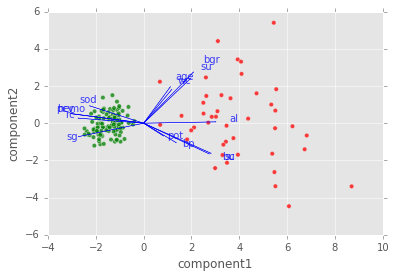

In [38]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
%matplotlib inline
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

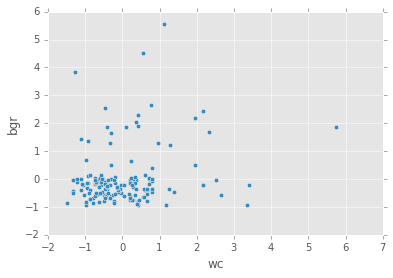

In [39]:
df.plot.scatter(x='wc', y='bgr')